<a href="https://colab.research.google.com/github/simoncardenas2002/Redes-Neuronales/blob/master/binary_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

In [2]:
#seleccionando 10000 palabras
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
#Obtengo las palabras con una función determinada de la libería
word_index=imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [4]:
#Cambio el orden de los valores para que primero me aparezca el numero
word_index=dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
word_index

In [ ]:
#funcion para imprimir las palabras
for _ in train_data[0]:
  print(word_index.get(_ -3)) #el -3 se pone porque las primeras 3 palabras son palabras reservadas

In [7]:
#
def vectorizar(sequences,dim=10000):
  results=np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [8]:
x_train=vectorizar(train_data)
x_test=vectorizar(test_data)

In [9]:
#Siempre es recomendado tener los datos en tipo float32

y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

### Crearemos el **modelo**

In [10]:
model=models.Sequential() #Modelo tipo secuencial
model.add(layers.Dense(16,activation="relu",input_shape=(10000,))) #capas densas de 16 neuronas con activacion reLu
model.add(layers.Dense(16,activation="relu")) #estas capas no requieren input porque son ocultas
model.add(layers.Dense(1,activation="sigmoid")) #Se cambia de función de activación por una apta para probabilidad 



In [11]:
model.compile(optimizer="rmsprop", #tipo de funcion optimizadora
              loss="binary_crossentropy",  #función de pérdida
              metrics=["acc"]) 

### Crearemos data de validacion

In [12]:
x_val= x_train[:10000]
partial_x_train=x_train[10000:]

y_val= y_train[:10000]
partial_y_train= y_train[10000:]

In [13]:
print(partial_y_train.shape)
print(partial_x_train.shape)
print(y_train.shape)
print(x_train.shape)

(15000,)
(15000, 10000)
(25000,)
(25000, 10000)


In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0717 - acc: 0.9800 - val_loss: 0.3520 - val_acc: 0.8815
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0573 - acc: 0.9867 - val_loss: 0.3902 - val_acc: 0.8784
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0501 - acc: 0.9891 - val_loss: 0.4553 - val_acc: 0.8678
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0452 - acc: 0.9892 - val_loss: 0.4248 - val_acc: 0.8704
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0376 - acc: 0.9913 - val_loss: 0.4349 - val_acc: 0.8759
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0320 - acc: 0.9932 - val_loss: 0.4603 - val_acc: 0.8710
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0234 - acc: 0.9969 - val_loss: 0.4941 - val_acc: 0.8753
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0233 - a

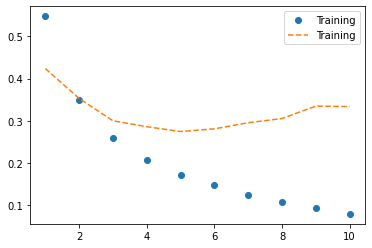

In [15]:
import matplotlib.pyplot as plt

#Obtenemos un diccionario del cambio de los valores en el entrenamiento
history_dict=history.history

loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epoch=range(1,len(loss_values)+1)
plt.plot(epoch,loss_values,"o",label="Training")
plt.plot(epoch,val_loss_values,"--",label="Training")
plt.legend()
plt.show()

In [16]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.3622 - acc: 0.8707


[0.3621637523174286, 0.8706799745559692]

Asi vemos que nuestro modelo tiene un accuracy del 85%


### Modelo menos complejo

In [21]:
model2=models.Sequential() #Modelo tipo secuencial
model2.add(layers.Dense(4,activation="relu",input_shape=(10000,))) #capas densas de 16 neuronas con activacion reLu
model2.add(layers.Dense(4,activation="relu")) #estas capas no requieren input porque son ocultas
model2.add(layers.Dense(1,activation="sigmoid")) #Se cambia de función de activación por una apta para probabilidad 

model2.compile(optimizer="rmsprop", #tipo de funcion optimizadora
              loss="binary_crossentropy",  #función de pérdida
              metrics=["acc"]) 

history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6198 - acc: 0.5985 - val_loss: 0.5630 - val_acc: 0.6638
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5147 - acc: 0.7761 - val_loss: 0.5107 - val_acc: 0.7970
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4606 - acc: 0.8547 - val_loss: 0.4807 - val_acc: 0.8509
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4249 - acc: 0.9001 - val_loss: 0.4696 - val_acc: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3994 - acc: 0.9221 - val_loss: 0.4718 - val_acc: 0.8455
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3794 - acc: 0.9354 - val_loss: 0.4731 - val_acc: 0.8468
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3613 - acc: 0.9458 - val_loss: 0.4814 - val_acc: 0.8467
Epoch 8/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3456 - a

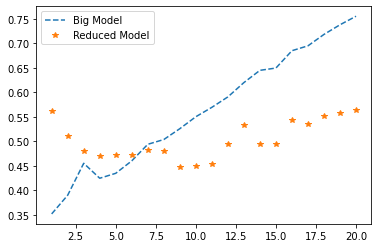

In [23]:
history_dict=history.history

loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
val_loss_values_2=history2.history["val_loss"]


epoch=range(1,len(loss_values)+1)

plt.plot(epoch,val_loss_values,"--",label="Big Model")
plt.plot(epoch,val_loss_values_2,"*",label="Reduced Model")

plt.legend()
plt.show()

### Regularización

In [24]:
from keras import regularizers

In [28]:
model3=models.Sequential() #Modelo tipo secuencial
model3.add(layers.Dense(16,activation="relu",input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001))) #capas densas de 16 neuronas con activacion reLu
model3.add(layers.Dense(16,activation="relu",
                        kernel_regularizer=regularizers.l2(0.001))) #estas capas no requieren input porque son ocultas
model3.add(layers.Dense(1,activation="sigmoid")) #Se cambia de función de activación por una apta para probabilidad 

model3.compile(optimizer="rmsprop", #tipo de funcion optimizadora
              loss="binary_crossentropy",  #función de pérdida
              metrics=["acc"]) 

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.5943 - acc: 0.7675 - val_loss: 0.4629 - val_acc: 0.8458
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3839 - acc: 0.8879 - val_loss: 0.3651 - val_acc: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3028 - acc: 0.9132 - val_loss: 0.3427 - val_acc: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2608 - acc: 0.9293 - val_loss: 0.3308 - val_acc: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2359 - acc: 0.9372 - val_loss: 0.3407 - val_acc: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2182 - acc: 0.9471 - val_loss: 0.3547 - val_acc: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2026 - acc: 0.9521 - val_loss: 0.3484 - val_acc: 0.8828
Epoch 8/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1909 - a

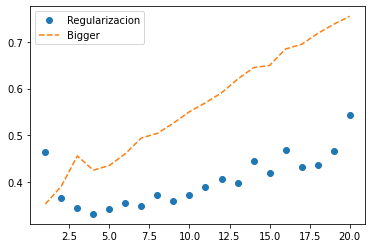

In [29]:
history_dict=history.history

loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
val_loss_values_3=history3.history["val_loss"]

epoch=range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_3,"o",label="Regularizacion")
plt.plot(epoch,val_loss_values,"--",label="Bigger")
plt.legend()
plt.show()

Se puede evidenciar la gran diferencia, el valor de pérdida no esacala tan drásticamente lo cual es mejor y ademas no requiere adicionar casi nada al codigo, simplemente agregar un parámetro que nos indique la regularización

### DropOut

In [30]:
model4=models.Sequential() #Modelo tipo secuencial
model4.add(layers.Dense(4,activation="relu",input_shape=(10000,))) #capas densas de 16 neuronas con activacion reLu
#DROPOUT se aplica como una capa
model4.add(layers.Dropout(0.5)) #Inactivará el 50% de las neuronas en cada iteracion
model4.add(layers.Dense(4,activation="relu")) #estas capas no requieren input porque son ocultas
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1,activation="sigmoid")) #Se cambia de función de activación por una apta para probabilidad 

model4.compile(optimizer="rmsprop", #tipo de funcion optimizadora
              loss="binary_crossentropy",  #función de pérdida
              metrics=["acc"]) 

history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6841 - acc: 0.5451 - val_loss: 0.6594 - val_acc: 0.6471
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6640 - acc: 0.5735 - val_loss: 0.6397 - val_acc: 0.8355
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6516 - acc: 0.5966 - val_loss: 0.6051 - val_acc: 0.8353
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.6321 - acc: 0.6306 - val_loss: 0.5790 - val_acc: 0.8521
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6143 - acc: 0.6383 - val_loss: 0.5294 - val_acc: 0.8644
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5807 - acc: 0.6490 - val_loss: 0.4968 - val_acc: 0.8704
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5659 - acc: 0.6566 - val_loss: 0.4673 - val_acc: 0.8747
Epoch 8/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5478 - a

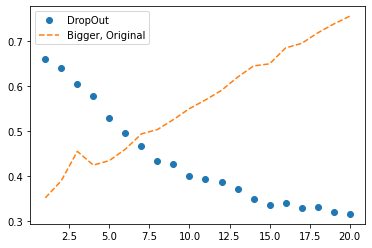

In [31]:
history_dict=history.history

loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]
val_loss_values_4=history4.history["val_loss"]

epoch=range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values_4,"o",label="DropOut")
plt.plot(epoch,val_loss_values,"--",label="Bigger, Original")
plt.legend()
plt.show()

Por tanto podemos ver que ya no tenemos esta "conspiración de las neuronas y entonces el Dropout es efectivo

*En resumen las 3 técnicas funcionan de forma apta para evitar el overfitting*

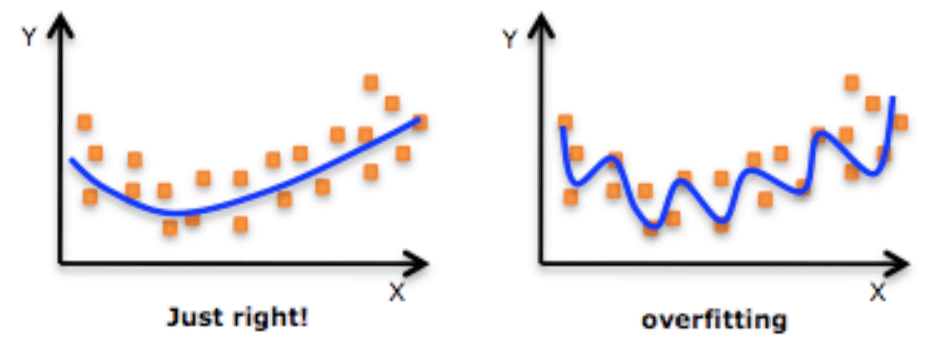

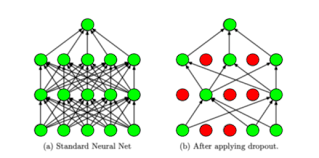

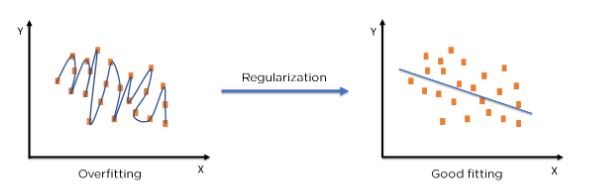